#Face Detection in Photos:
### [Matthew Davis](https://www.youtube.com/channel/UCJNZxBqs8ElqouPqAkZLlqg), 2020

[Repo for full implementation](https://github.com/Deamoner/GDPR-privacy-filter-photo-scrubbing)

This notebook is part of the larger Privy-Filter open source Photo de-identification library and services as the experimentation ground before objectifying into the library for distribution. 

The colab uses some of the standard libraries to identify faces in images and return an erray of faces if there are more then one. 

Important Resources Used:
- [OpenCV](https://opencv.org/) - Open Source library for computer vision
- [Privyfilter](https://github.com/Deamoner/privyfilter)



In [0]:
#Load Libraries:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
#Integrate google to allow photos to be uploaded 
file=files.upload()
#extracting files names
allfiles = []
for fn in file.keys():
  allfiles.append(fn)

Saving Copy of Cardio Workout Playlist YouTube Thumbnail.png to Copy of Cardio Workout Playlist YouTube Thumbnail (1).png


In [0]:
#Config the pipeline and get the face location data
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread(allfiles[0])
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
print(faces)

()


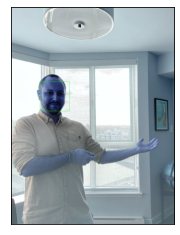

In [0]:
#Showing the faces data and on the image 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    #roigray = gray[y:y+h, x:x+w]
    #roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

In [0]:
def anonymize_face(image, blocks=6):
    (h, w) = image.shape[:2]
    xSteps = np.linspace(0, w, blocks + 1, dtype='int')
    ySteps = np.linspace(0, h, blocks + 1, dtype='int')
    
    for i in range(1, len(ySteps)):
        for j in range(1, len(xSteps)):
            startX = xSteps[j - 1]
            startY = ySteps[i - 1]
            endX = xSteps[j]
            endY = ySteps[i]

            roi = image[startY: endY, startX:endX]
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
            cv2.rectangle(image, (startX, startY), (endX, endY), (B, G, R), -1)
    
    return image

def find_and_blur(bw, color):
    cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = cascade.detectMultiScale(bw, 1.1, 4)
    for (x, y, w, h) in faces:
        color[y:y+h, x:x+w] = anonymize_face(color[y:y+h, x:x+w])

In [0]:
find_and_blur(img, img)

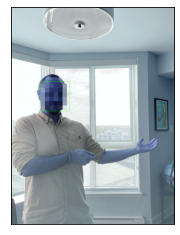

In [0]:
#Showing the faces data and on the image 
#for (x,y,w,h) in faces:
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    #roigray = gray[y:y+h, x:x+w]
    #roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

In [3]:
#or just use our library
#https://github.com/Deamoner/privyfilter
!pip install privyfilter

     |████████████████████████████████| 143kB 2.7MB/s 
     |████████████████████████████████| 2.1MB 8.6MB/s 
     |████████████████████████████████| 28.2MB 126kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [5]:
from privyfilter.privyfilter import Privyfilter as pf

faces, imger = pf.faceScrub(allfiles[0])
print(faces)

[[1159  352   67   67]
 [  56  405   65   65]]
